# Demonstrate fNIRS NIRx Capabilities in MNE

In [1]:
import mne
import os.path as op
import numpy as np
from mne.io import read_raw_nirx
import matplotlib.pyplot as plt
from itertools import compress

plt.rcParams["figure.figsize"] = (8,4)

## Read raw data exported directly from NIRx machine

In [2]:
raw = read_raw_nirx('/home/rluke/Documents/Data/test_15_2', preload=True);

Loading /home/rluke/Documents/Data/test_15_2
Reading 0 ... 16062  =      0.000 ...  4111.872 secs...


### View raw data

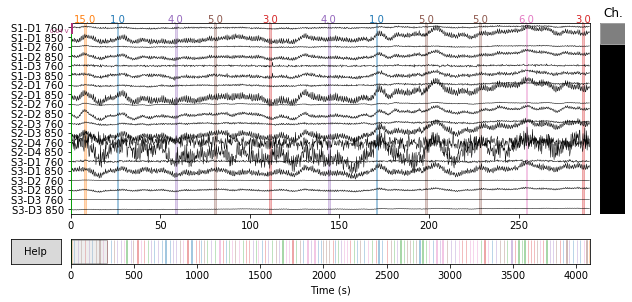

In [3]:
raw.plot(duration=290, start=0);

## Extract epochs and plot average event

Used Annotations descriptions: ['1.0', '15.0', '2.0', '3.0', '4.0', '5.0', '6.0']


<ipython-input-4-5b59924b831d>:3: RuntimeWarning: event 2 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
<ipython-input-4-5b59924b831d>:3: RuntimeWarning: event 4 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
<ipython-input-4-5b59924b831d>:3: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
<ipython-input-4-5b59924b831d>:3: RuntimeWarning: event 6 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
<ipython-input-4-5b59924b831d>:3: RuntimeWarning: event 7 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])


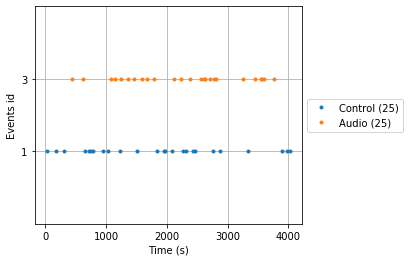

In [4]:
events, _ = mne.events_from_annotations(raw)
event_dict = {'Control': 1, 'Audio': 3}
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
fig.subplots_adjust(right=0.7)  # make room for the legend

In [5]:
# Confirm we have no short channels
any(raw._short_channels())

False

In [6]:
event_id, tmin, tmax = [3, 4, 5, 6, 7], -3, 12
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, baseline=(None, 0), preload=True, detrend = 1, verbose=True);

125 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 125 events and 60 original time points ...
0 bad epochs dropped


50 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Loading data for 50 events and 64 original time points ...
0 bad epochs dropped
50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


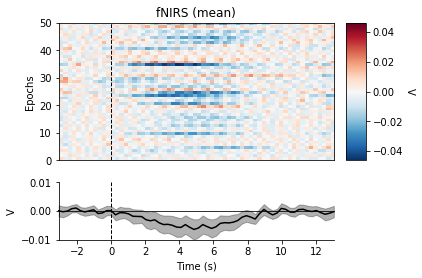

[<Figure size 432x288 with 3 Axes>]

In [7]:
take = np.array(['850' in a for a in epochs.ch_names])
picks850 = mne.pick_channels(epochs.ch_names, list(compress(epochs.ch_names, take)))
event_id, tmin, tmax = [3, 4], -3, 13
epochs850 = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False, picks=picks850, preload=True, detrend = 1)
epochs850.plot_image(combine = 'mean')

### Compare control to audio

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 1.85 Hz (-6 dB cutoff frequency: 1.03 Hz)
- Filter length: 1289 samples (329.984 sec)

50 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Loading data for 50 events and 52 original time points ...
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


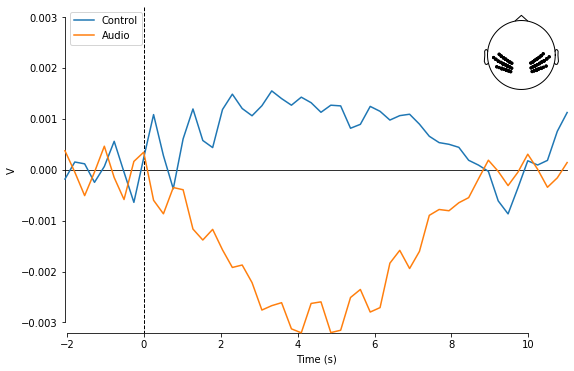

[<Figure size 648x432 with 2 Axes>]

In [8]:
event_id, tmin, tmax = [1, 3], -2, 11
event_dict = {'Control': 1, 'Audio': 3}

epochs850 = mne.Epochs(raw.filter(0.01, 0.1), events, event_dict, tmin, tmax, 
                       proj=False, preload=True, detrend = 1)

letters = ["Control", "Audio"]
evokeds = dict()
for n_letters in letters:
    evokeds[n_letters] = epochs850[n_letters].average()

fig, ax = plt.subplots(figsize=(9, 6))
mne.viz.plot_compare_evokeds(evokeds, axes=ax, combine='mean', show_sensors='upper right', ci=0.95)

## Validate sensor location positions

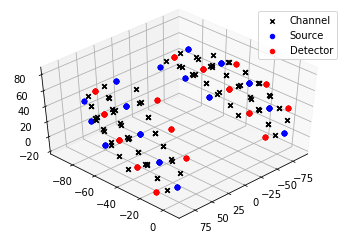

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(len(raw.info['chs'])):

    if idx == 1: label = 'Channel'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][0], 
               raw.info['chs'][idx]['loc'][1], 
               raw.info['chs'][idx]['loc'][2],
               marker = 'x', edgecolors='k', color='k', label=label)
    
    if idx == 1: label = 'Source'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][3], 
               raw.info['chs'][idx]['loc'][4], 
               raw.info['chs'][idx]['loc'][5],
               marker = 'o', edgecolors='b', color='b', label=label)
    
    if idx == 1: label = 'Detector'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][6], 
               raw.info['chs'][idx]['loc'][7], 
               raw.info['chs'][idx]['loc'][8],
               marker = 'o', edgecolors='r', color='r', label=label)
    
ax.view_init(45, 45)
ax.legend()

plt.show()